
# Project: Investigate a Dataset - [No-show appointments]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
# Introduction 

### Dataset Descrion :

This dataset contains information about patient appointments at a medical facility, including whether the patients showed up for their scheduled appointments or not.  
 It contains 110.527 medical appointments its 14 associated variables (characteristics). 

| Field Name      | Description                                                              |
|-----------------|--------------------------------------------------------------------------|
| PatientId       | Unique identifier for each patient                                       |
| AppointmentID   | Unique identifier for each appointment                                   |
| Gender          | Male or Female                                                           |
| ScheduledDay    | The day the appointment was scheduled                                    |
| AppointmentDay  | The day of the actual appointment                                        |
| Age             | Patient  age                                                            |
| Neighbourhood   | Where the appointment takes place                                        |
| Scholarship     | Indicates whether the patient is enrolled in Brazilian welfare program   |
| Hipertension    | Indicates if the patient has hypertension                                |
| Diabetes        | Indicates if the patient has diabetes                                    |
| Alcoholism      | Indicates if the patient has alcoholism                                  |
| Handcap         | Indicates the degree of physical handicap                                |
| SMS_received    | Indicates if the patient received a SMS reminder about the appointment   |
| No-show         | Indicates if the patient showed up for the appointment (No) or did not show up (Yes) |


# Question(s) for Analysis

**Research Question 1:**[ What is the overall gender breakdown of the patient population in the no-show appointments dataset?](#q1)

 
 **Research Question 2:**[What is the overall attendance rate for all appointments?](#q2)
 
 
**Research Quastion 3:**[There is a significant difference in the no-show rates between different age groups?](#q3)

 
**Research Quastion 4:**[Is the age a major risk factor for hypertension?](#q4)



In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd 
import numpy as np
# While optional for current notebooks, if you are having trouble with visualizations,
#   remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


<a id='wrangling'></a>
## Data Wrangling


In [2]:
# Load your data and print out a few lines. What is the size of your dataframe? 

df = pd.read_csv('Database_No_show_appointments/noshowappointments-kagglev2-may-2016.csv')
df
#   Perform operations to inspect data types and look for instances of missing
#   or possibly errant data. There are at least 4 - 6 methods you can call on your
#   dataframe to obtain this information.


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No


Concise overview of the dataframe, including the number of rows and columns, the column names, data types, and the count of non-null values for each column. This information is valuable for understanding the structure and characteristics of the data.  

<a id='DE'></a>
###  Dataset Exploration

In [3]:
#disply some rows from the beginning  of the dataset
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
#disply some rows from the  the end of the dataset
df.tail()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No
110526,3.775115e+14,5629448,F,2016-04-27T13:30:56Z,2016-06-07T00:00:00Z,54,MARIA ORTIZ,0,0,0,0,0,1,No


In [5]:
print(f'# of rows {df.shape[0]},# of columns {df.shape[1]}')

# of rows 110527,# of columns 14


This is a tuple of the dimensions of the dataframe :   
The data frame has 110527 rows ,This indicates that the data frame contains 110527 observations or data points.  And 14 columns, This tells us that the data frame has 14 features or variables.


### How many rows contain missing values?

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


The data is comprehensive and does not contain any null or blank values that could potentially impact the analysis, ensuring that all the necessary information is present and accounted for. The data frame has a mix of data types such as integers, floats and  objects.


### Data Cleaning
 

### What is the level of uniqueness and duplication in the no show appointments DataFrame? 

In [7]:
df.duplicated().any()

False

The lack of duplicate rows indicates that the data in the DataFrame is unique across all rows. This suggests that each row represents a distinct observation or data point.

In [8]:
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

### Datatype optimization 

Optimizing data types can have a significant impact on the memory footprint of a dataset.  
Optimizing data types is a crucial step in managing the memory size and overall efficiency of a dataset. It can reduce memory usage, improve performance, enhance scalability, and lead to cost savings.

#### Numerical Optimization

Currently the DataFrame is a mixture of objects, float64, and int64 data types. We can also see the memory usage - 11.8+ MB
Let's see what values are present in the Hipertension,Diabetes,Alcoholism,Scholarship and Handcap columns

Using int8 instead of int64 in Python can optimize memory and performance

In [9]:
# find Hipertension value counts
df.Hipertension.value_counts()

0    88726
1    21801
Name: Hipertension, dtype: int64

In [10]:
# find Diabetes value counts
df.Diabetes.value_counts()

0    102584
1      7943
Name: Diabetes, dtype: int64

In [11]:
# find Alcoholism value counts
df.Alcoholism.value_counts()

0    107167
1      3360
Name: Alcoholism, dtype: int64

In [12]:
df.Scholarship.value_counts()

0    99666
1    10861
Name: Scholarship, dtype: int64

In [13]:
# find Handcap value counts
df.Handcap.value_counts()

0    108286
1      2042
2       183
3        13
4         3
Name: Handcap, dtype: int64

In [14]:
# find SMS_received value counts
df.SMS_received.value_counts()

0    75045
1    35482
Name: SMS_received, dtype: int64

In [15]:
df["Hipertension"] = df["Hipertension"].astype("int8")
df["Diabetes"] = df["Diabetes"].astype("int8")
df["Alcoholism"] = df["Alcoholism"].astype("int8")
df["Scholarship"] = df["Scholarship"].astype("int8")
df["Handcap"] = df["Handcap"].astype("int8")
df["SMS_received"] = df["SMS_received"].astype("int8")

In [16]:
# Convert 'ScheduledDay' column to datetime data type
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])

# Convert 'AppointmentDay' column to datetime data type
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

In [17]:
# Verify the conversions and memory usage by printing the data types of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientId       110527 non-null  float64            
 1   AppointmentID   110527 non-null  int64              
 2   Gender          110527 non-null  object             
 3   ScheduledDay    110527 non-null  datetime64[ns, UTC]
 4   AppointmentDay  110527 non-null  datetime64[ns, UTC]
 5   Age             110527 non-null  int64              
 6   Neighbourhood   110527 non-null  object             
 7   Scholarship     110527 non-null  int8               
 8   Hipertension    110527 non-null  int8               
 9   Diabetes        110527 non-null  int8               
 10  Alcoholism      110527 non-null  int8               
 11  Handcap         110527 non-null  int8               
 12  SMS_received    110527 non-null  int8               
 13  No-show       

The memory usage changed from 11.8+ MB to 7.4+ MB by changing the way of  storing the  int values.


#### String Optimization

In [18]:
# find trans value counts
df["Gender"].value_counts()

F    71840
M    38687
Name: Gender, dtype: int64

In [19]:
# find trans value counts
df["No-show"].value_counts()

No     88208
Yes    22319
Name: No-show, dtype: int64

Since these object columns have 2 unique values, changing the two object columns to category, and pandas will store those columns more efficiently.

In [20]:
# assign Gender and No-show to "category" using .astype()
df["Gender"] = df["Gender"].astype("category")
df["No-show"] = df["No-show"].astype("category")

In [21]:
# df info to view data type and memory usage changes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientId       110527 non-null  float64            
 1   AppointmentID   110527 non-null  int64              
 2   Gender          110527 non-null  category           
 3   ScheduledDay    110527 non-null  datetime64[ns, UTC]
 4   AppointmentDay  110527 non-null  datetime64[ns, UTC]
 5   Age             110527 non-null  int64              
 6   Neighbourhood   110527 non-null  object             
 7   Scholarship     110527 non-null  int8               
 8   Hipertension    110527 non-null  int8               
 9   Diabetes        110527 non-null  int8               
 10  Alcoholism      110527 non-null  int8               
 11  Handcap         110527 non-null  int8               
 12  SMS_received    110527 non-null  int8               
 13  No-show       

By changing those columns to categories, we further reduced  the dataset from 7.4+ MB to  5.9+ MB. We effectively reduced the memory usage by 20.27%. 

Now the dataset appears to be  clean and ready to use , with no immediate data quality issues that would require additional cleaning or preprocessing before proceeding with the analysis. This allows  to confidently move on to the next steps in the data analysis workflow.

### Rename columns 

Since converting headers to uppercase promotes consistency and readability in data presentation, facilitating easier access and usability of the information we covert using the lambda function  

In [22]:
# replace spaces with underscores and lowercase labels for th dataset
df.rename(columns=lambda x: x.strip().upper().replace(" ", "_"), inplace=True)

# confirm changes
df.head(1)

,PATIENTID,APPOINTMENTID,GENDER,SCHEDULEDDAY,APPOINTMENTDAY,AGE,NEIGHBOURHOOD,SCHOLARSHIP,HIPERTENSION,DIABETES,ALCOHOLISM,HANDCAP,SMS_RECEIVED,NO-SHOW
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No


<a id='eda'></a>
## Exploratory Data Analysis

### Measurs of center 

These calculations pinpoint the typical value in the data, summarizing where most data points cluster. This offers a quick grasp of the data's central tendency.  

In [23]:
for column in ['AGE']:
    # Convert the column data to a NumPy array
    column_data = df[column].to_numpy()
    
    # Calculate the mean value of the column
    mean_value = np.mean(column_data)
    
    # Calculate the median value of the column
    median_value = np.median(column_data)
    
    # Print the results
    print(f"For column '{column}':")
    print(f"  Mean: {mean_value:.2f}")
    print(f"  Median: {median_value:.2f}")

For column 'AGE':
  Mean: 37.09
  Median: 37.00


Mean: 37.09  
The mean age of 37.09 suggests the dataset has a central tendency around 37 years old.
This is a reasonable mean age for many adult populations.

Median: 37.00  
The median age of 37.00 is very close to the mean, indicating a symmetric or near-symmetric distribution of ages.


### Measurs of spread


Calculating measures of spread, such as range, variance, standard deviation, and interquartile range (IQR), is essential for understanding the variability and distribution of data. These measures provide insights into how much the data points differ from the mean, help identify outliers, and allow for comparisons between different datasets.

In [24]:

# Convert the 'AGE' column to a NumPy array
ages = df['AGE'].to_numpy()

# Calculate the range of ages (max age - min age)
age_range = np.max(ages) - np.min(ages)

# Calculate the variance of ages
age_variance = np.var(ages)

# Calculate the standard deviation of ages
age_std_dev = np.std(ages)

# Calculate the interquartile range (IQR) of ages
age_iqr = np.percentile(ages, 75) - np.percentile(ages, 25)

# Add a title to the histogram


# Print the calculated statistics
print("Range:", age_range)
print("Variance:", age_variance)
print("Standard Deviation:", age_std_dev)
print("Interquartile Range (IQR):", age_iqr)

Range: 116
Variance: 534.0767413267181
Standard Deviation: 23.11010041792805
Interquartile Range (IQR): 37.0


Range:  
The range is 116, which means the difference between the maximum and minimum ages is 116.  

Variance:  
The variance is 534.08, which indicates a relatively high degree of spread in the ages around the mean.  

Standard Deviation:  
The standard deviation is 23.11, which represents a large average deviation of each age value from the mean age. 

Interquartile Range (IQR):  
The IQR is 37, which means the middle 50% of the ages fall within a range of 37.

<a id="q1"></a>
### Research Question 1( What is the overall gender breakdown of the patient population in the no-show appointments dataset?)

In [25]:
import matplotlib.pyplot as plt

def plot_pie_chart(df, column, title):
   
    # Calculate the counts or percentages for each unique value in the column
    values_count = df[column].value_counts()

    # Create the pie chart
    plt.figure(figsize=(8, 8))
    plt.pie(values_count, labels=values_count.index, autopct='%1.1f%%')
    plt.title(title)
    plt.axis('equal')  # Equal aspect ratio ensures that pie is circular.
    plt.show()


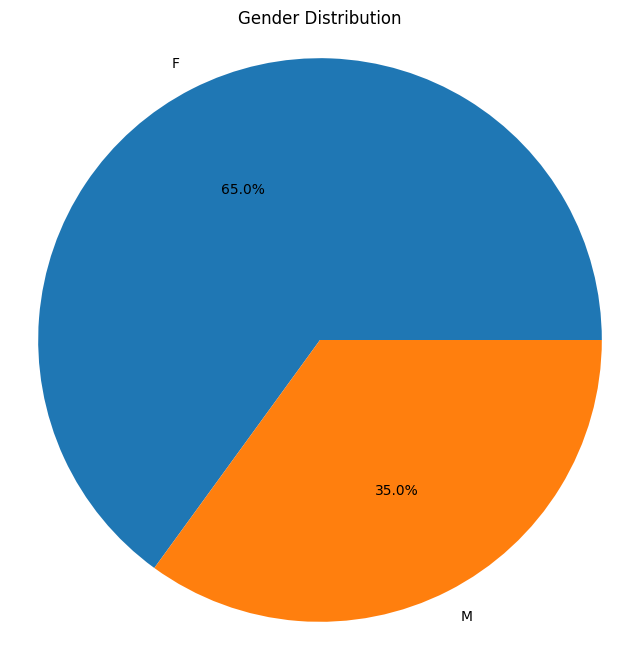

In [26]:

# Plot the pie chart for the gender distribution
plot_pie_chart(df, 'GENDER', 'Gender Distribution')
  
    

The pie chart shows the gender distribution of the data. The blue slice represents the "F" (female) gender, while the orange slice represents the "M" (male) gender.

It appears that the female gender makes up a larger portion about 65% of the data compared to the male gender about 35 %, the chart suggests that the dataset is skewed towards having more female scheduling appointments.


<a id="q2"></a>
### Research Question 2( What is the overall attendance rate for all appointments?)

Show rate for both genders:

In [27]:
# Count the total number of appointments
total_appointments = df.shape[0]

# Count the number of " show" appointments
show_count = df[df["NO-SHOW"] == "No"].shape[0]

# Calculate the show rate
show_rate = show_count / total_appointments

In [28]:

print(f"The show_rate for both genders is {show_rate:%}")

The show_rate for both genders is 79.806744%


<a id="q3"></a>
### Research Question 3( There is a significant difference in the show rates between different age groups?)

In [29]:
df.groupby(by="GENDER").mean(numeric_only=True).sort_values(by="AGE", ascending=True)

,PATIENTID,APPOINTMENTID,AGE,SCHOLARSHIP,HIPERTENSION,DIABETES,ALCOHOLISM,HANDCAP,SMS_RECEIVED
GENDER,,,,,,,,,
M,1.502496e+14,5.677102e+06,33.736863,0.051904,0.167033,0.060408,0.055238,0.027270,0.291571
F,1.460136e+14,5.674337e+06,38.893987,0.123232,0.213516,0.078035,0.017024,0.019543,0.336888


  To gain a comprehensive understanding of attendance behavior, the show rate provides a full picture by indicating the percentage of attended appointments, which is the complement of the no-show rate.

***NO-SHOW (absence) rate by gender***

In [30]:
no_show_rates_by_gender = df.groupby("GENDER")["NO-SHOW"].apply(lambda x: (x == "Yes").mean())
no_show_rates_by_gender


GENDER
F    0.203146
M    0.199679
Name: NO-SHOW, dtype: float64

The no-show rate for females (F) is 20.31%, while the no-show rate for males (M) is 19.97%.
The difference in no-show rates between females and males is relatively small, only about 0.34 % , This suggests that gender may not be a major factor in predicting no-show behavior for this data.

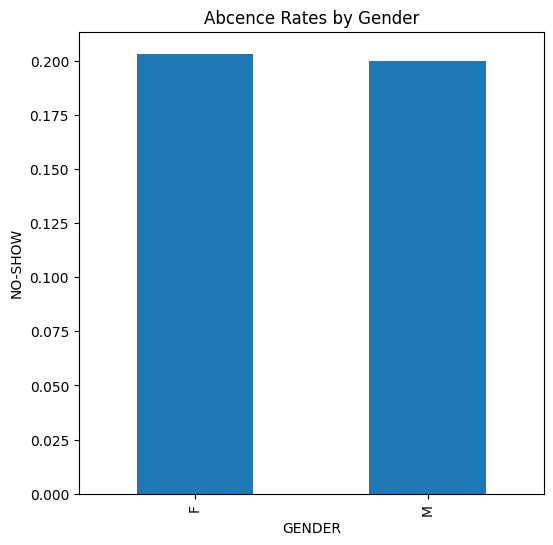

In [31]:
import matplotlib.pyplot as plt

# Attendance rates by gender
gender_attendance = pd.Series({'F': 0.203146, 'M': 0.199679})

# Calculate the overall attendance rate
overall_attendance = gender_attendance.mean()

# Create the figure and axis objects
fig, ax = plt.subplots(figsize=(6, 6))

# Plot the bar chart
gender_attendance.plot(kind='bar', ax=ax)

# Add labels and title
ax.set_xlabel('GENDER')
ax.set_ylabel('NO-SHOW')
ax.set_title('Abcence Rates by Gender')

# Show the plot
plt.show()

 This is a bar chart that compares the absentee rates (or "no-show" rates) between female (F) and male (M) genders. The vertical axis represents the "NO-SHOW" rate, which is a measure of the absence or non-attendance rate.

The chart indicates that the absentee rate for females (F) is approximately 0.203, while the absentee rate for males (M) is slightly lower at around 0.200. This suggests that the absentee rate is slightly higher for females compared to males based on the data presented in this visualization.

<a id='q4'></a>
### Research Question 4  (Is the age  a major risk factor for hypertension?)

This research question aims to investigate the association between the continuous variable 'AGE' and the binary variable 'HIPERTENSION' using both Chi-Square and ANOVA tests .

##### Chi-Square Test

In [32]:
from scipy.stats import chi2_contingency

# Perform Chi-Square test
contingency_table = pd.crosstab(df['HIPERTENSION'], df['AGE'])
chi2, p_value, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-Square Test:")
print(f"  Chi-Square Statistic: {chi2:.4f}")
print(f"  p-value: {p_value:.4f}")


Chi-Square Test:
  Chi-Square Statistic: 31710.7117
  p-value: 0.0000


**Hypothesis**

Null hypothesis: There is no association between age and the presence of hypertension.

Alternative hypothesis: There is a significant association between age and the

**Result Interpretation**

The p-value (0.0001) is less than the commonly used significance level of 0.05.
Therefore, we can reject the null hypothesis and conclude that there is a statistically significant association between age and the presence of hypertension in the study population.

the results of the Chi-Square test suggest that the probability of having hypertension is not independent of a person's age. The two variables, age and hypertension, are significantly associated with each other.

This means that as a person's age increases, the likelihood of them having hypertension also tends to increase, or vice versa. 


##### ANOVA

In [33]:
from scipy.stats import f_oneway
# Perform ANOVA
print("\nANOVA:")
f_value, p_value = f_oneway(df.loc[df['HIPERTENSION'] == 0, 'AGE'],
                           df.loc[df['HIPERTENSION'] == 1, 'AGE'])
print(f"  F-statistic: {f_value:.4f}")
print(f"  p-value: {p_value:.4f}")


ANOVA:
  F-statistic: 37752.5428
  p-value: 0.0000


**Hypothesis**

Null hypothesis: There is no difference in mean age between the hypertensive and non-hypertensive groups.

Alternative hypothesis: There is a significant difference in mean age between the hypertensive and non-hypertensive groups.

**Result Interpretation**

The p-value is also extremely small (0)
This indicates that there is a highly significant difference in the mean age between the hypertensive and non-hypertensive groups.
Which means that the age is a very strong predictor of hypertension.

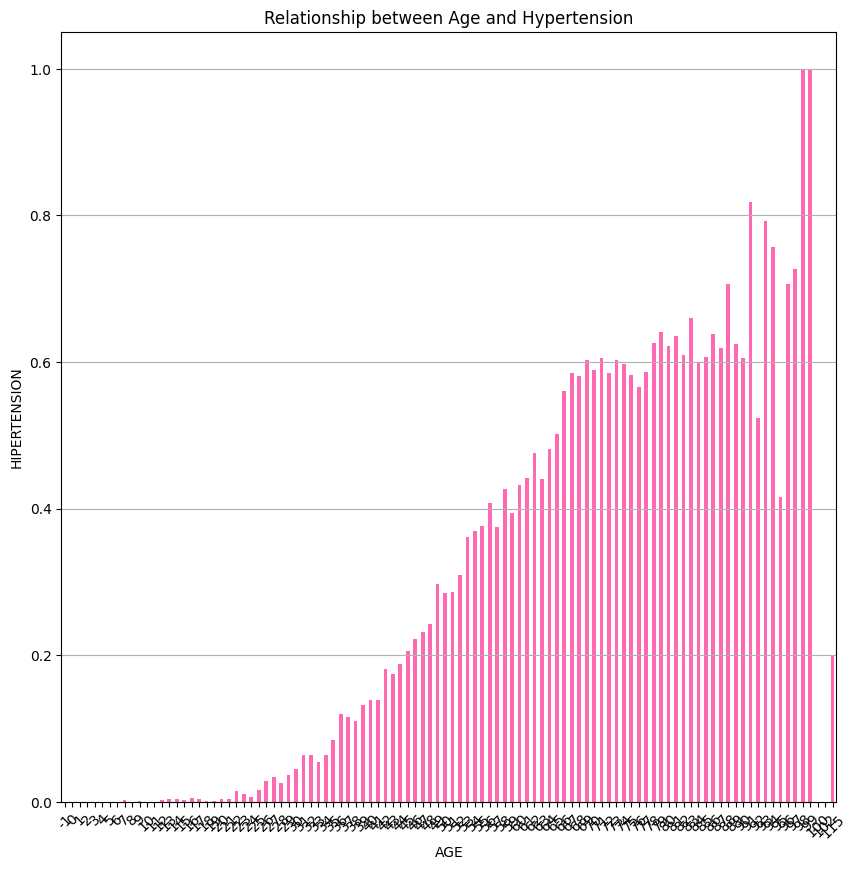

In [34]:
import matplotlib.pyplot as plt

# Group the data by age and calculate the hypertension rate
hypertension_rates = df.groupby('AGE')['HIPERTENSION'].mean()

# Create the bar chart
plt.figure(figsize=(10, 10))
hypertension_rates.plot(kind='bar', color='hotpink')

# Add labels and title
plt.xlabel('AGE')
plt.ylabel('HIPERTENSION')
plt.title('Relationship between Age and Hypertension')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()



Simple bar chart that shows the hypertension rate for each age group. 
The height of the bars represents the proportion of individuals with hypertension within each age group.

This bar chart provides a clear and straightforward visualization of the strong positive relationship between age and hypertension prevalence. It highlights the importance of age as a key risk factor for hypertension.

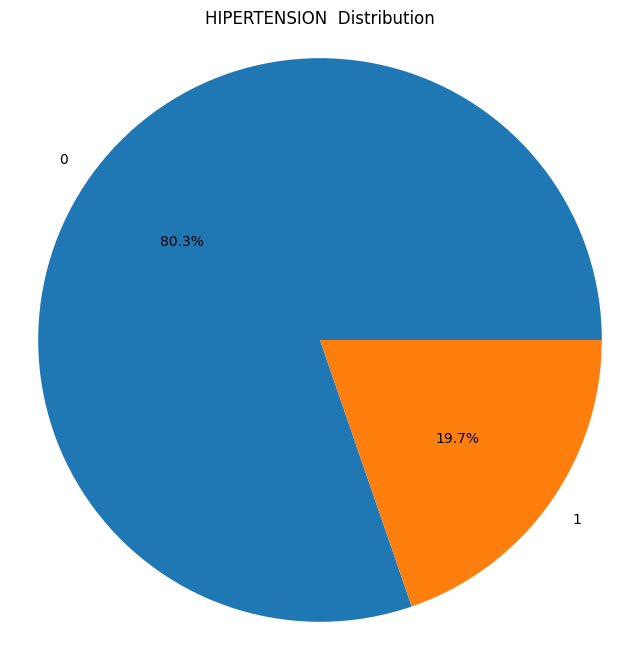

In [35]:
import matplotlib.pyplot as plt

# Plot the pie chart for the gender distribution
plot_pie_chart(df, 'HIPERTENSION', 'HIPERTENSION  Distribution')

The pie chart provides a clear and concise representation of the hypertension status within the given population. It allows for a quick and easy understanding of the relative proportions of individuals with and without hypertension, which can be useful for various healthcare-related analyses and decision-making processes.  
The chart indicates that almost  80% of the population has hypertension, while  almost 20% does not have hypertension.


In [36]:
df = df[df["NO-SHOW"] == "No"]
df.head(10)

,PATIENTID,APPOINTMENTID,GENDER,SCHEDULEDDAY,APPOINTMENTDAY,AGE,NEIGHBOURHOOD,SCHOLARSHIP,HIPERTENSION,DIABETES,ALCOHOLISM,HANDCAP,SMS_RECEIVED,NO-SHOW
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,9.598513e+13,5626772,F,2016-04-27 08:36:51+00:00,2016-04-29 00:00:00+00:00,76,REPÚBLICA,0,1,0,0,0,0,No
8,5.639473e+13,5638447,F,2016-04-29 08:02:16+00:00,2016-04-29 00:00:00+00:00,21,ANDORINHAS,0,0,0,0,0,0,No
9,7.812456e+13,5629123,F,2016-04-27 12:48:25+00:00,2016-04-29 00:00:00+00:00,19,CONQUISTA,0,0,0,0,0,0,No
10,7.345362e+14,5630213,F,2016-04-27 14:58:11+00:00,2016-04-29 00:00:00+00:00,30,NOVA PALESTINA,0,0,0,0,0,0,No
12,5.666548e+14,5634718,F,2016-04-28 11:33:51+00:00,2016-04-29 00:00:00+00:00,22,NOVA PALESTINA,1,0,0,0,0,0,No


<a id='conclusions'></a>
## Conclusions

- The proximity of the mean and median implies the age data is not heavily skewed.  
- The measurs of spread results suggest that the ages in the dataset have a relatively wide distribution, with a large range, high variance, and substantial standard deviation. The IQR of 37 also indicates a fairly broad spread in the middle 50% of the ages.    
- Based on the visual representation,The data appears to be skewed towards having a larger proportion of female participants compared to males, suggesting the dataset represents more female scheduling appointments than male.  
- The no-show rates between females and males are quite similar, indicating gender may not be a significant factor in predicting no-show behavior for this data.  
- The Chi-Square test results indicate a statistically significant association between  the age and the presence of hypertension.This suggests the probability of having hypertension is not independent of age - as a person's age increases, the likelihood of having hypertension also tends to increase, or vice versa.    
- The ANOVA results demonstrate that age is a highly significant predictor of hypertension status in this dataset.  
- The bar chart visually demonstrates the strong positive relationship between age and hypertension prevalence, underscoring the importance of age as a significant risk factor for hypertension.

**Limitations**  

The present study provides insights into the gender breakdown, attendance rates, and age-related factors in the no-show appointments dataset. However, there are some limitations to the analysis that should be considered.  
One key limitation of this study is the lack of information on the reasons for patient no-shows. The dataset only indicates whether an appointment was attended or missed, but does not provide details on the underlying causes for the missed appointments. Understanding the specific reasons for no-shows could offer more nuanced insights and help inform targeted interventions to improve attendance rates.

For example, if a significant proportion of no-shows were due to transportation issues or scheduling conflicts, that would suggest the need for improved appointment scheduling, transportation assistance, or better coordination with patients' personal commitments. Conversely, if many no-shows were related to health factors, such as worsening symptoms or competing medical priorities, that would point to a need for better patient education, symptom monitoring, or care coordination.

Without this contextual information, the analysis is limited to identifying general patterns in attendance rates, but cannot provide the granular insights necessary to develop effective solutions. Future research should aim to collect more detailed data on the reasons for missed appointments, potentially through patient surveys, electronic health record data, or other methods that capture the multifaceted factors contributing to no-show behavior.

Additionally, collecting information on the rescheduling or rebooking of missed appointments could provide a more complete picture of patient engagement with the healthcare system. Patients who reschedule their missed appointments may have different characteristics or motivations compared to those who do not, which could further inform strategies to reduce no-shows and improve overall appointment attendance.

By addressing this limitation in future studies, researchers can better contextualize the observed attendance patterns and generate insights that are more actionable for healthcare providers and policymakers seeking to enhance patient access and utilization of healthcare services.  




In [38]:
# Running this cell will execute a bash command to convert this notebook to an .html file
!python -m nbconvert --to html Investigate_a_Dataset.ipynb

[NbConvertApp] Converting notebook Investigate_a_Dataset.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 4 image(s).
[NbConvertApp] Writing 529004 bytes to Investigate_a_Dataset.html
